### Step 1: Import Necessary Libraries

- **pandas**: For data manipulation and analysis.
- **train_test_split**: For splitting the dataset into training and testing sets.
- **OneHotEncoder**: For encoding categorical features.
- **StandardScaler**: For standardizing numerical features.
- **ColumnTransformer**: For applying different preprocessing steps to different subsets of features.
- **Pipeline**: For assembling several steps into one pipeline.


In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

### Step 2: Load the Data

- Use `pandas` to read the CSV file containing the dataset.
- The dataset contains reviews of British Airways


In [ ]:
# Load the data
data = pd.read_csv('C:/Users/kush2/OneDrive/Desktop/Projects/BA Reviews/british-airways.csv')

### Step 2.1: Inspect the Data

- **data.head()**: Display the first few rows of the dataset to understand its structure.
- **data.info()**: Get a summary of the dataset, including data types and missing values.


In [43]:
# Display the first few rows of the dataset to understand its structure
data.head()

# Get a summary of the dataset, including data types and missing values
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  1200 non-null   object        
 1   rating                 1200 non-null   int64         
 2   review_date            1200 non-null   datetime64[ns]
 3   review                 1200 non-null   object        
 4   trip_verified          1200 non-null   bool          
 5   aircraft               1200 non-null   object        
 6   type_of_traveller      1200 non-null   object        
 7   seat_type              1200 non-null   object        
 8   route                  1200 non-null   object        
 9   date_flown             1200 non-null   object        
 10  seat_comfort           1200 non-null   float64       
 11  cabin_staff_service    1200 non-null   float64       
 12  food_and_beverages     1200 non-null   float64       
 13  gro

### Step 3: Ensure Data Types Are Correct

- Convert columns to appropriate data types to ensure correct processing:
  - `rating`: Convert to numeric.
  - `review_date`: Convert to datetime.
  - `seat_comfort`: Convert to numeric.
  - `cabin_staff_service`: Convert to numeric.
  - `ground_service`: Convert to numeric.
  - `value_for_money`: Convert to numeric.
  - `wifi_and_connectivity`: Convert to numeric.
  - `recommend`: Convert to boolean.


In [5]:
# To Ensure data types are correct 
data['rating'] = pd.to_numeric(data['rating'], errors='coerce')
data['review_date'] = pd.to_datetime(data['review_date'], format='%d/%m/%Y', errors='coerce')
data['seat_comfort'] = pd.to_numeric(data['seat_comfort'], errors='coerce')
data['cabin_staff_service'] = pd.to_numeric(data['cabin_staff_service'], errors='coerce')
data['ground_service'] = pd.to_numeric(data['ground_service'], errors='coerce')
data['value_for_money'] = pd.to_numeric(data['value_for_money'], errors='coerce')
data['wifi_and_connectivity'] = pd.to_numeric(data['wifi_and_connectivity'], errors='coerce')
data['recommend'] = data['recommend'].astype(bool)

### Step 4: Handle Missing Values

- Fill missing values with appropriate statistics:
  - **Numeric columns**: Fill with the mean value.
    - `seat_comfort`
    - `cabin_staff_service`
    - `ground_service`
    - `food_and_beverages`: Extract numeric values from strings before filling.
    - `wifi_and_connectivity`
  - **Categorical columns**: Fill with the mode (most frequent value).
    - `aircraft`
    - `type_of_traveller`
    - `route`


In [6]:
# Fill missing values with mean/mode
data['seat_comfort'].fillna(data['seat_comfort'].mean(), inplace=True)
data['cabin_staff_service'].fillna(data['cabin_staff_service'].mean(), inplace=True)
data['ground_service'].fillna(data['ground_service'].mean(), inplace=True)
data['food_and_beverages'] = data['food_and_beverages'].str.extract('>(\d+)<', expand=False).astype(float)
data['food_and_beverages'].fillna(data['food_and_beverages'].mean(), inplace=True)
data['wifi_and_connectivity'].fillna(data['wifi_and_connectivity'].mean(), inplace=True)
data['aircraft'].fillna(data['aircraft'].mode()[0], inplace=True)
data['type_of_traveller'].fillna(data['type_of_traveller'].mode()[0], inplace=True)
data['route'].fillna(data['route'].mode()[0], inplace=True)

<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
C:\Users\kush2\AppData\Local\Temp\ipykernel_17048\3592201887.py:5: SyntaxWarning: invalid escape sequence '\d'
  data['food_and_beverages'] = data['food_and_beverages'].str.extract('>(\d+)<', expand=False).astype(float)
C:\Users\kush2\AppData\Local\Temp\ipykernel_17048\3592201887.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['seat_comfort'].fillna(data['seat_comfort'].mean(), inplace=True)
C:\Users\kush2\AppData\Local

### Step 5: Drop Unnecessary Columns

- Drop columns that are not required for analysis.
  - `wifi_and_connecticity`: This column appears to be a typo or duplicate of `wifi_and_connectivity`.

In [7]:
# Drop unnecessary column
data.drop(columns=['wifi_and_connecticity'], inplace=True)

### Step 6: Separate Features and Target Variable

- Define the features (`X`) and the target variable (`y`).
  - **Features**: Drop columns that are not used for prediction.
    - `recommend`: The target variable.
    - `review`: Text review (will be handled separately).
    - `review_date`: Date of review (not directly used).
    - `date_flown`: Date flown (not directly used).
  - **Target Variable**: `recommend`


In [8]:
# Separate features and target variable
X = data.drop(columns=['recommend', 'review', 'review_date', 'date_flown'])
y = data['recommend']


### Step 7: Identify Categorical and Numeric Features

- Identify which features are categorical and which are numeric for preprocessing.
  - **Categorical Features**: 
    - `aircraft`
    - `type_of_traveller`
    - `seat_type`
    - `route`
  - **Numeric Features**: 
    - `rating`
    - `seat_comfort`
    - `cabin_staff_service`
    - `food_and_beverages`
    - `ground_service`
    - `value_for_money`
    - `wifi_and_connectivity`


In [9]:
# Identify categorical and numeric features
categorical_features = ['aircraft', 'type_of_traveller', 'seat_type', 'route']
numeric_features = ['rating', 'seat_comfort', 'cabin_staff_service', 'food_and_beverages', 'ground_service', 'value_for_money', 'wifi_and_connectivity']

### Step 8: Preprocessing Pipeline

- Create a preprocessing pipeline to handle both numeric and categorical features:
  - **Numeric Features**: Apply `StandardScaler` to standardize the features.
  - **Categorical Features**: Apply `OneHotEncoder` to encode categorical variables.


In [11]:
# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

### Step 9: Split the Data

- Split the dataset into training and testing sets:
  - **Training Set**: Used to train the model.
  - **Testing Set**: Used to evaluate the model's performance.
- Parameters:
  - `test_size=0.2`: 20% of the data will be used for testing.
  - `random_state=42`: Ensures reproducibility of the results.


In [12]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Step 10: Apply Preprocessing

- Apply the preprocessing pipeline to the training and testing sets:
  - **fit_transform on X_train**: Fit the preprocessors to the training data and transform it.
  - **transform on X_test**: Transform the testing data using the already fitted preprocessors.


In [13]:
# Apply preprocessing
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [14]:
# Print the shape of the transformed datasets
print(X_train_transformed.shape, X_test_transformed.shape)

(960, 754) (240, 754)


### Step 11: Feature Engineering with TF-IDF

- **TF-IDF Vectorization**: Convert text reviews into numerical features using TF-IDF.
  - **TF-IDF**: Term Frequency-Inverse Document Frequency, used to reflect the importance of a term in a document relative to the entire corpus.
  - **max_features=500**: Limit to the top 500 terms to reduce dimensionality.
- **Combine Features**: Merge the TF-IDF text features with the preprocessed structured features.


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
import scipy.sparse

# Extract features from the text reviews using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=500)
X_train_text = tfidf_vectorizer.fit_transform(data.loc[X_train.index, 'review'])
X_test_text = tfidf_vectorizer.transform(data.loc[X_test.index, 'review'])

# Combine text features with the preprocessed structured features
X_train_combined = scipy.sparse.hstack((X_train_transformed, X_train_text))
X_test_combined = scipy.sparse.hstack((X_test_transformed, X_test_text))

# Print the shape of the combined datasets
print(X_train_combined.shape, X_test_combined.shape)


(960, 1254) (240, 1254)


In [47]:
# Load the data
data = pd.read_csv('C:/Users/kush2/OneDrive/Desktop/Projects/BA Reviews/british-airways.csv')

### Step 12: Train and Evaluate Logistic Regression Model

- **Train a Logistic Regression model**: 
  - `LogisticRegression(max_iter=1000)`: Initialize the model with a maximum of 1000 iterations.
  - **Fit the model**: Train the model on the combined training set.
- **Make Predictions**:
  - Predict on the training set.
  - Predict on the testing set.
  - Obtain predicted probabilities for ROC-AUC evaluation.
- **Evaluate the Model**:
  - **Accuracy**: Measure the percentage of correct predictions.
  - **Precision**: Measure the proportion of positive identifications that were actually correct.
  - **Recall**: Measure the proportion of actual positives that were identified correctly.
  - **F1 Score**: Harmonic mean of precision and recall.
  - **AUC-ROC**: Measure the ability of the model to distinguish between classes.
- **Print the Evaluation Metrics**: Display the performance metrics of the model.


In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Train a Logistic Regression model
logistic_regression = LogisticRegression(max_iter=1000)
logistic_regression.fit(X_train_combined, y_train)

# Make predictions
y_pred_train = logistic_regression.predict(X_train_combined)
y_pred_test = logistic_regression.predict(X_test_combined)
y_pred_proba_test = logistic_regression.predict_proba(X_test_combined)[:, 1]

# Evaluate the model
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
auc_roc = roc_auc_score(y_test, y_pred_proba_test)

# Print the evaluation metrics
print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"AUC-ROC: {auc_roc}")



Training Accuracy: 0.978125
Testing Accuracy: 0.9375
Precision: 0.9506172839506173
Recall: 0.875
F1 Score: 0.9112426035502958
AUC-ROC: 0.993421052631579


### Step 13: Train and Evaluate Random Forest Model

- **Train a Random Forest model**:
  - Initialize the model with `RandomForestClassifier(n_estimators=100, random_state=42)`.
  - Fit the model on the combined training set using `random_forest.fit(X_train_combined, y_train)`.
- **Make Predictions**:
  - Predict on the training set using `random_forest.predict(X_train_combined)`.
  - Predict on the testing set using `random_forest.predict(X_test_combined)`.
  - Obtain predicted probabilities for ROC-AUC evaluation using `random_forest.predict_proba(X_test_combined)[:, 1]`.
- **Evaluate the Model**:
  - **Accuracy**: Measure the percentage of correct predictions with `accuracy_score`.
  - **Precision**: Measure the proportion of positive identifications that were actually correct with `precision_score`.
  - **Recall**: Measure the proportion of actual positives that were identified correctly with `recall_score`.
  - **F1 Score**: Harmonic mean of precision and recall with `f1_score`.
  - **AUC-ROC**: Measure the ability of the model to distinguish between classes with `roc_auc_score`.
- **Print the Evaluation Metrics**: Display the performance metrics of the model.


In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Train a Random Forest model
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train_combined, y_train)

# Make predictions
y_pred_train_rf = random_forest.predict(X_train_combined)
y_pred_test_rf = random_forest.predict(X_test_combined)
y_pred_proba_test_rf = random_forest.predict_proba(X_test_combined)[:, 1]

# Evaluate the model
train_accuracy_rf = accuracy_score(y_train, y_pred_train_rf)
test_accuracy_rf = accuracy_score(y_test, y_pred_test_rf)
precision_rf = precision_score(y_test, y_pred_test_rf)
recall_rf = recall_score(y_test, y_pred_test_rf)
f1_rf = f1_score(y_test, y_pred_test_rf)
auc_roc_rf = roc_auc_score(y_test, y_pred_proba_test_rf)

# Print the evaluation metrics
print(f"Random Forest - Training Accuracy: {train_accuracy_rf}")
print(f"Random Forest - Testing Accuracy: {test_accuracy_rf}")
print(f"Random Forest - Precision: {precision_rf}")
print(f"Random Forest - Recall: {recall_rf}")
print(f"Random Forest - F1 Score: {f1_rf}")
print(f"Random Forest - AUC-ROC: {auc_roc_rf}")


Random Forest - Training Accuracy: 1.0
Random Forest - Testing Accuracy: 0.9291666666666667
Random Forest - Precision: 0.9733333333333334
Random Forest - Recall: 0.8295454545454546
Random Forest - F1 Score: 0.8957055214723927
Random Forest - AUC-ROC: 0.9929724880382775


### Step 14: Hyperparameter Tuning with GridSearchCV

- **Hyperparameter Tuning**:
  - Use `GridSearchCV` to find the best hyperparameters for the Random Forest model.
- **Parameter Grid**:
  - `n_estimators`: Number of trees in the forest.
  - `max_depth`: Maximum depth of the tree.
  - `min_samples_split`: Minimum number of samples required to split an internal node.
  - `min_samples_leaf`: Minimum number of samples required to be at a leaf node.
- **Grid Search**:
  - Initialize `GridSearchCV` with the Random Forest estimator, parameter grid, and scoring metric (`roc_auc`).
  - Fit the grid search on the combined training set.
- **Results**:
  - Retrieve the best parameters and the best AUC-ROC score from the grid search.


In [19]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Grid Search
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=3, n_jobs=-1, scoring='roc_auc')

# Fit Grid Search
grid_search.fit(X_train_combined, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and the best score
print(f"Best Parameters: {best_params}")
print(f"Best AUC-ROC Score: {best_score}")


Best Parameters: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Best AUC-ROC Score: 0.9889289162507134


### Step 15: Train and Evaluate the Best Random Forest Model

- **Train the Best Random Forest Model**:
  - Initialize the model with the best parameters obtained from `GridSearchCV` using `RandomForestClassifier(**best_params, random_state=42)`.
  - Fit the model on the combined training set using `best_random_forest.fit(X_train_combined, y_train)`.

- **Make Predictions**:
  - Predict on the training set using `best_random_forest.predict(X_train_combined)`.
  - Predict on the testing set using `best_random_forest.predict(X_test_combined)`.
  - Obtain predicted probabilities for ROC-AUC evaluation using `best_random_forest.predict_proba(X_test_combined)[:, 1]`.

- **Evaluate the Model**:
  - **Accuracy**: Measure the percentage of correct predictions using `accuracy_score`.
  - **Precision**: Measure the proportion of positive identifications that were actually correct using `precision_score`.
  - **Recall**: Measure the proportion of actual positives that were identified correctly using `recall_score`.
  - **F1 Score**: Harmonic mean of precision and recall using `f1_score`.
  - **AUC-ROC**: Measure the ability of the model to distinguish between classes using `roc_auc_score`.

- **Print the Evaluation Metrics**: Display the performance metrics of the model to assess its performance.


In [20]:
# Train the best Random Forest model
best_random_forest = RandomForestClassifier(**best_params, random_state=42)
best_random_forest.fit(X_train_combined, y_train)

# Make predictions
y_pred_train_best_rf = best_random_forest.predict(X_train_combined)
y_pred_test_best_rf = best_random_forest.predict(X_test_combined)
y_pred_proba_test_best_rf = best_random_forest.predict_proba(X_test_combined)[:, 1]

# Evaluate the model
train_accuracy_best_rf = accuracy_score(y_train, y_pred_train_best_rf)
test_accuracy_best_rf = accuracy_score(y_test, y_pred_test_best_rf)
precision_best_rf = precision_score(y_test, y_pred_test_best_rf)
recall_best_rf = recall_score(y_test, y_pred_test_best_rf)
f1_best_rf = f1_score(y_test, y_pred_test_best_rf)
auc_roc_best_rf = roc_auc_score(y_test, y_pred_proba_test_best_rf)

# Print the evaluation metrics
print(f"Best Random Forest - Training Accuracy: {train_accuracy_best_rf}")
print(f"Best Random Forest - Testing Accuracy: {test_accuracy_best_rf}")
print(f"Best Random Forest - Precision: {precision_best_rf}")
print(f"Best Random Forest - Recall: {recall_best_rf}")
print(f"Best Random Forest - F1 Score: {f1_best_rf}")
print(f"Best Random Forest - AUC-ROC: {auc_roc_best_rf}")


Best Random Forest - Training Accuracy: 0.9854166666666667
Best Random Forest - Testing Accuracy: 0.9375
Best Random Forest - Precision: 0.974025974025974
Best Random Forest - Recall: 0.8522727272727273
Best Random Forest - F1 Score: 0.9090909090909091
Best Random Forest - AUC-ROC: 0.9935705741626795


### Step 16: Save the Best Model

- **Save the Best Model**:
  - Use the `joblib` library to save the trained model to a file.
  - Specify the filename for the model.
  - Save the model using `joblib.dump`.
- **Output**:
  - Print a confirmation message indicating where the model has been saved.


In [21]:
import joblib

# Save the best model to a file
model_filename = 'best_random_forest_model.joblib'
joblib.dump(best_random_forest, model_filename)

print(f"Model saved to {model_filename}")


Model saved to best_random_forest_model.joblib


### Step 17: Load and Evaluate the Saved Model

- **Load the Saved Model**:
  - Use the `joblib` library to load the saved model from the file using `joblib.load(model_filename)`.

- **Make Predictions**:
  - Use the loaded model to make predictions on the testing set with `loaded_model.predict(X_test_combined)`.
  - Obtain predicted probabilities for ROC-AUC evaluation with `loaded_model.predict_proba(X_test_combined)[:, 1]`.

- **Evaluate the Loaded Model**:
  - **Accuracy**: Measure the percentage of correct predictions using `accuracy_score`.
  - **Precision**: Measure the proportion of positive identifications that were actually correct using `precision_score`.
  - **Recall**: Measure the proportion of actual positives that were identified correctly using `recall_score`.
  - **F1 Score**: Harmonic mean of precision and recall using `f1_score`.
  - **AUC-ROC**: Measure the ability of the model to distinguish between classes using `roc_auc_score`.

- **Print the Evaluation Metrics**: Display the performance metrics of the loaded model to confirm it performs as expected.


In [23]:
# Load the saved model from the file
loaded_model = joblib.load(model_filename)

# Use the loaded model to make predictions
y_pred_test_loaded_model = loaded_model.predict(X_test_combined)
y_pred_proba_test_loaded_model = loaded_model.predict_proba(X_test_combined)[:, 1]

# Evaluate the loaded model
loaded_test_accuracy = accuracy_score(y_test, y_pred_test_loaded_model)
loaded_precision = precision_score(y_test, y_pred_test_loaded_model)
loaded_recall = recall_score(y_test, y_pred_test_loaded_model)
loaded_f1 = f1_score(y_test, y_pred_test_loaded_model)
loaded_auc_roc = roc_auc_score(y_test, y_pred_proba_test_loaded_model)

# Print the evaluation metrics
print(f"Loaded Model - Testing Accuracy: {loaded_test_accuracy}")
print(f"Loaded Model - Precision: {loaded_precision}")
print(f"Loaded Model - Recall: {loaded_recall}")
print(f"Loaded Model - F1 Score: {loaded_f1}")
print(f"Loaded Model - AUC-ROC: {loaded_auc_roc}")


Loaded Model - Testing Accuracy: 0.9375
Loaded Model - Precision: 0.974025974025974
Loaded Model - Recall: 0.8522727272727273
Loaded Model - F1 Score: 0.9090909090909091
Loaded Model - AUC-ROC: 0.9935705741626795


### Step 18: Visualize Feature Importance

- **Get Feature Names**:
  - Retrieve feature names from the preprocessing pipeline:
    - **Categorical Features**: Extract names from the `OneHotEncoder`.
    - **Numeric Features**: Use the original numeric feature names.
    - **Text Features**: Create names for TF-IDF features.
  - Combine all feature names into a single array.
- **Get Feature Importances**:
  - Retrieve feature importances from the trained Random Forest model using `best_random_forest.feature_importances_`.
- **Sort Feature Importances**:
  - Sort the feature importances in descending order and get their indices.
  - Select the top N features to plot.
- **Plot Feature Importances**:
  - Create a bar plot to visualize the top N feature importances.
  - Set the plot title and labels for better readability.


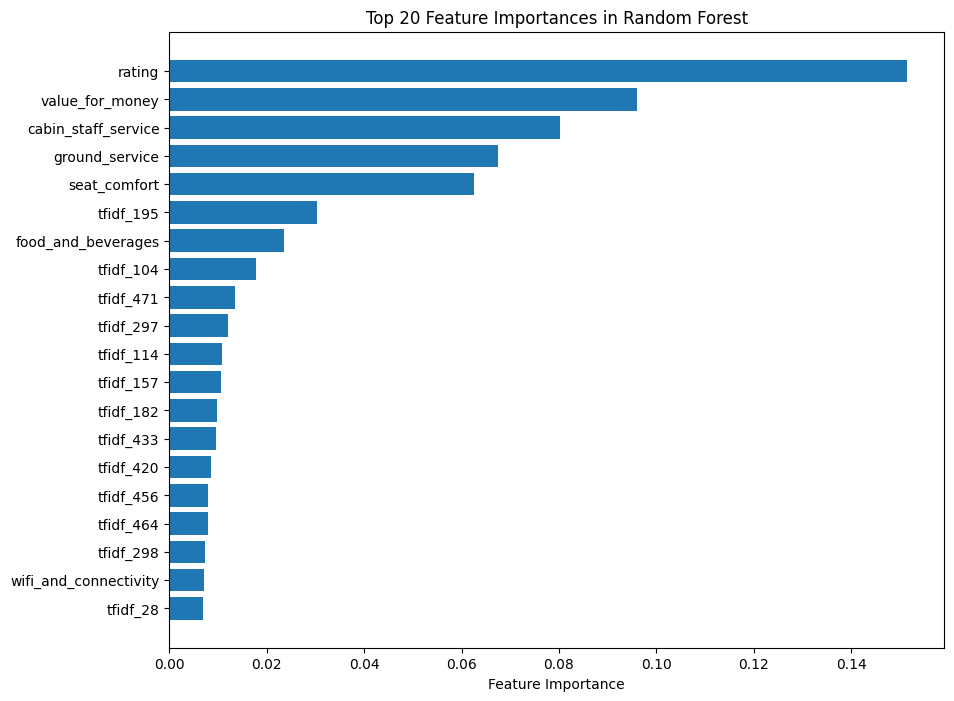

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Get feature names from the preprocessing pipeline
cat_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
num_feature_names = numeric_features
text_feature_names = [f'tfidf_{i}' for i in range(X_train_text.shape[1])]

# Combine all feature names
all_feature_names = np.hstack((num_feature_names, cat_feature_names, text_feature_names))

# Get feature importances from the best random forest model
feature_importances = best_random_forest.feature_importances_

# Sort the feature importances in descending order and get their indices
sorted_idx = np.argsort(feature_importances)[::-1]

# Select the top N features to plot
top_n = 20
top_feature_indices = sorted_idx[:top_n]
top_feature_importances = feature_importances[top_feature_indices]
top_feature_names = [all_feature_names[i] for i in top_feature_indices]

# Plot the feature importances
plt.figure(figsize=(10, 8))
plt.title(f"Top {top_n} Feature Importances in Random Forest")
plt.barh(range(top_n), top_feature_importances, align='center')
plt.yticks(range(top_n), top_feature_names)
plt.gca().invert_yaxis()
plt.xlabel("Feature Importance")
plt.show()


### Step 19: Train and Evaluate Gradient Boosting Model

- **Train a Gradient Boosting model**:
  - Initialize the model with `GradientBoostingClassifier(random_state=42)`.
  - Fit the model on the combined training set using `gradient_boosting.fit(X_train_combined, y_train)`.

- **Make Predictions**:
  - Predict on the training set using `gradient_boosting.predict(X_train_combined)`.
  - Predict on the testing set using `gradient_boosting.predict(X_test_combined)`.
  - Obtain predicted probabilities for ROC-AUC evaluation using `gradient_boosting.predict_proba(X_test_combined)[:, 1]`.

- **Evaluate the Model**:
  - **Accuracy**: Measure the percentage of correct predictions using `accuracy_score`.
  - **Precision**: Measure the proportion of positive identifications that were actually correct using `precision_score`.
  - **Recall**: Measure the proportion of actual positives that were identified correctly using `recall_score`.
  - **F1 Score**: Harmonic mean of precision and recall using `f1_score`.
  - **AUC-ROC**: Measure the ability of the model to distinguish between classes using `roc_auc_score`.

- **Print the Evaluation Metrics**: Display the performance metrics of the model to assess its performance.


In [28]:
from sklearn.ensemble import GradientBoostingClassifier

# Train a Gradient Boosting model
gradient_boosting = GradientBoostingClassifier(random_state=42)
gradient_boosting.fit(X_train_combined, y_train)

# Make predictions
y_pred_train_gb = gradient_boosting.predict(X_train_combined)
y_pred_test_gb = gradient_boosting.predict(X_test_combined)
y_pred_proba_test_gb = gradient_boosting.predict_proba(X_test_combined)[:, 1]

# Evaluate the model
train_accuracy_gb = accuracy_score(y_train, y_pred_train_gb)
test_accuracy_gb = accuracy_score(y_test, y_pred_test_gb)
precision_gb = precision_score(y_test, y_pred_test_gb)
recall_gb = recall_score(y_test, y_pred_test_gb)
f1_gb = f1_score(y_test, y_pred_test_gb)
auc_roc_gb = roc_auc_score(y_test, y_pred_proba_test_gb)

# Print the evaluation metrics
print(f"Gradient Boosting - Training Accuracy: {train_accuracy_gb}")
print(f"Gradient Boosting - Testing Accuracy: {test_accuracy_gb}")
print(f"Gradient Boosting - Precision: {precision_gb}")
print(f"Gradient Boosting - Recall: {recall_gb}")
print(f"Gradient Boosting - F1 Score: {f1_gb}")
print(f"Gradient Boosting - AUC-ROC: {auc_roc_gb}")


Gradient Boosting - Training Accuracy: 1.0
Gradient Boosting - Testing Accuracy: 0.9458333333333333
Gradient Boosting - Precision: 0.9518072289156626
Gradient Boosting - Recall: 0.8977272727272727
Gradient Boosting - F1 Score: 0.9239766081871345
Gradient Boosting - AUC-ROC: 0.9898699162679426


### Step 20: SHAP Values for Model Interpretation

- **SHAP Values**:
  - SHAP (SHapley Additive exPlanations) values provide a unified measure of feature importance.
- **Convert Sparse Matrix to Dense**:
  - Convert the sparse matrix to a dense matrix for SHAP values calculation using `X_test_combined.toarray()`.
- **Calculate SHAP Values**:
  - Initialize a SHAP TreeExplainer with the trained Random Forest model using `shap.TreeExplainer(best_random_forest)`.
  - Calculate SHAP values for the testing set using `explainer.shap_values(X_test_combined_dense)`.
- **Plot SHAP Summary**:
  - Create a summary plot to visualize feature importance and their impact on the model predictions using `shap.summary_plot`.


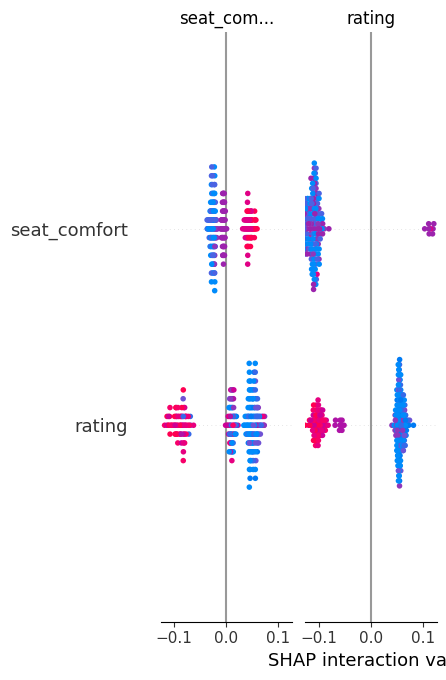

In [36]:
import shap

# Convert sparse matrix to dense matrix for SHAP values calculation
X_test_combined_dense = X_test_combined.toarray()

# Calculate SHAP values
explainer = shap.TreeExplainer(best_random_forest)
shap_values = explainer.shap_values(X_test_combined_dense)

# Plot SHAP summary
shap.summary_plot(shap_values, X_test_combined_dense, feature_names=all_feature_names)


### Step 21: Cross-Validation

- **Cross-Validation**:
  - Use cross-validation to evaluate the stability and generalization of the model.
  - Perform 5-fold cross-validation on the training set.
  - Evaluate the model using the AUC-ROC score.
- **Calculate and Print Scores**:
  - Calculate the cross-validation scores using `cross_val_score`.
  - Print the individual AUC-ROC scores for each fold.
  - Print the mean AUC-ROC score to assess the overall model performance.


In [38]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation and print the mean AUC-ROC score
cv_scores = cross_val_score(best_random_forest, X_train_combined, y_train, cv=5, scoring='roc_auc')
print(f"Cross-Validation AUC-ROC Scores: {cv_scores}")
print(f"Mean AUC-ROC Score: {cv_scores.mean()}")


Cross-Validation AUC-ROC Scores: [0.98991935 0.98671727 0.9857685  0.99051233 0.99407021]
Mean AUC-ROC Score: 0.9893975332068312


### Step 22: Train and Evaluate Gradient Boosting Model

- **Train a Gradient Boosting Model**:
  - Initialize the model with `GradientBoostingClassifier(random_state=42)`.
  - Fit the model on the combined training set using `gradient_boosting.fit(X_train_combined, y_train)`.

- **Make Predictions**:
  - Predict on the training set using `gradient_boosting.predict(X_train_combined)`.
  - Predict on the testing set using `gradient_boosting.predict(X_test_combined)`.
  - Obtain predicted probabilities for ROC-AUC evaluation using `gradient_boosting.predict_proba(X_test_combined)[:, 1]`.

- **Evaluate the Model**:
  - **Accuracy**: Measure the percentage of correct predictions using `accuracy_score`.
  - **Precision**: Measure the proportion of positive identifications that were actually correct using `precision_score`.
  - **Recall**: Measure the proportion of actual positives that were identified correctly using `recall_score`.
  - **F1 Score**: Harmonic mean of precision and recall using `f1_score`.
  - **AUC-ROC**: Measure the ability of the model to distinguish between classes using `roc_auc_score`.

- **Print the Evaluation Metrics**: Display the performance metrics of the model to assess its performance.


In [39]:
from sklearn.ensemble import GradientBoostingClassifier

# Train a Gradient Boosting model
gradient_boosting = GradientBoostingClassifier(random_state=42)
gradient_boosting.fit(X_train_combined, y_train)

# Make predictions
y_pred_train_gb = gradient_boosting.predict(X_train_combined)
y_pred_test_gb = gradient_boosting.predict(X_test_combined)
y_pred_proba_test_gb = gradient_boosting.predict_proba(X_test_combined)[:, 1]

# Evaluate the model
train_accuracy_gb = accuracy_score(y_train, y_pred_train_gb)
test_accuracy_gb = accuracy_score(y_test, y_pred_test_gb)
precision_gb = precision_score(y_test, y_pred_test_gb)
recall_gb = recall_score(y_test, y_pred_test_gb)
f1_gb = f1_score(y_test, y_pred_test_gb)
auc_roc_gb = roc_auc_score(y_test, y_pred_proba_test_gb)

# Print the evaluation metrics
print(f"Gradient Boosting - Training Accuracy: {train_accuracy_gb}")
print(f"Gradient Boosting - Testing Accuracy: {test_accuracy_gb}")
print(f"Gradient Boosting - Precision: {precision_gb}")
print(f"Gradient Boosting - Recall: {recall_gb}")
print(f"Gradient Boosting - F1 Score: {f1_gb}")
print(f"Gradient Boosting - AUC-ROC: {auc_roc_gb}")


Gradient Boosting - Training Accuracy: 1.0
Gradient Boosting - Testing Accuracy: 0.9458333333333333
Gradient Boosting - Precision: 0.9518072289156626
Gradient Boosting - Recall: 0.8977272727272727
Gradient Boosting - F1 Score: 0.9239766081871345
Gradient Boosting - AUC-ROC: 0.9898699162679426


### Step 23: Hyperparameter Tuning with GridSearchCV for Random Forest

- **Hyperparameter Tuning**:
  - Use `GridSearchCV` to find the best hyperparameters for the Random Forest model.

- **Parameter Grid**:
  - `n_estimators`: Number of trees in the forest.
  - `max_depth`: Maximum depth of the tree.
  - `min_samples_split`: Minimum number of samples required to split an internal node.
  - `min_samples_leaf`: Minimum number of samples required to be at a leaf node.

- **Grid Search**:
  - Initialize `GridSearchCV` with the Random Forest estimator, parameter grid, and scoring metric (`roc_auc`).
  - Perform 3-fold cross-validation.

- **Fit the Grid Search**:
  - Fit the grid search on the combined training set using `grid_search.fit(X_train_combined, y_train)`.

- **Results**:
  - Retrieve the best parameters and the best AUC-ROC score from the grid search using `grid_search.best_params_` and `grid_search.best_score_`.
  - Print the best parameters and the best score to understand the optimal model configuration.


In [40]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Grid Search
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=3, n_jobs=-1, scoring='roc_auc')

# Fit Grid Search
grid_search.fit(X_train_combined, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and the best score
print(f"Best Parameters: {best_params}")
print(f"Best AUC-ROC Score: {best_score}")


Best Parameters: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Best AUC-ROC Score: 0.9889289162507134


### Step 24: Train and Evaluate the Best Random Forest Model

- **Train the Best Random Forest Model**:
  - Initialize the model with the best parameters obtained from `GridSearchCV` using `RandomForestClassifier(**best_params, random_state=42)`.
  - Fit the model on the combined training set using `best_random_forest_tuned.fit(X_train_combined, y_train)`.

- **Make Predictions**:
  - Predict on the training set using `best_random_forest_tuned.predict(X_train_combined)`.
  - Predict on the testing set using `best_random_forest_tuned.predict(X_test_combined)`.
  - Obtain predicted probabilities for ROC-AUC evaluation using `best_random_forest_tuned.predict_proba(X_test_combined)[:, 1]`.

- **Evaluate the Model**:
  - **Accuracy**: Measure the percentage of correct predictions using `accuracy_score`.
  - **Precision**: Measure the proportion of positive identifications that were actually correct using `precision_score`.
  - **Recall**: Measure the proportion of actual positives that were identified correctly using `recall_score`.
  - **F1 Score**: Harmonic mean of precision and recall using `f1_score`.
  - **AUC-ROC**: Measure the ability of the model to distinguish between classes using `roc_auc_score`.

- **Print the Evaluation Metrics**: Display the performance metrics of the model to assess its performance.


In [41]:
# Train the best Random Forest model
best_random_forest_tuned = RandomForestClassifier(**best_params, random_state=42)
best_random_forest_tuned.fit(X_train_combined, y_train)

# Make predictions
y_pred_train_best_rf_tuned = best_random_forest_tuned.predict(X_train_combined)
y_pred_test_best_rf_tuned = best_random_forest_tuned.predict(X_test_combined)
y_pred_proba_test_best_rf_tuned = best_random_forest_tuned.predict_proba(X_test_combined)[:, 1]

# Evaluate the model
train_accuracy_best_rf_tuned = accuracy_score(y_train, y_pred_train_best_rf_tuned)
test_accuracy_best_rf_tuned = accuracy_score(y_test, y_pred_test_best_rf_tuned)
precision_best_rf_tuned = precision_score(y_test, y_pred_test_best_rf_tuned)
recall_best_rf_tuned = recall_score(y_test, y_pred_test_best_rf_tuned)
f1_best_rf_tuned = f1_score(y_test, y_pred_test_best_rf_tuned)
auc_roc_best_rf_tuned = roc_auc_score(y_test, y_pred_proba_test_best_rf_tuned)

# Print the evaluation metrics
print(f"Tuned Random Forest - Training Accuracy: {train_accuracy_best_rf_tuned}")
print(f"Tuned Random Forest - Testing Accuracy: {test_accuracy_best_rf_tuned}")
print(f"Tuned Random Forest - Precision: {precision_best_rf_tuned}")
print(f"Tuned Random Forest - Recall: {recall_best_rf_tuned}")
print(f"Tuned Random Forest - F1 Score: {f1_best_rf_tuned}")
print(f"Tuned Random Forest - AUC-ROC: {auc_roc_best_rf_tuned}")


Tuned Random Forest - Training Accuracy: 0.9854166666666667
Tuned Random Forest - Testing Accuracy: 0.9375
Tuned Random Forest - Precision: 0.974025974025974
Tuned Random Forest - Recall: 0.8522727272727273
Tuned Random Forest - F1 Score: 0.9090909090909091
Tuned Random Forest - AUC-ROC: 0.9935705741626795
